# Preprocesamiento y análisis de datos multivariados.

Primero procedo a importar cada una de las variables que voy a ocupar para el desarrollo de la actividad, asi como lolizar la ubicacion de mis archivos csv

In [1]:
!pip install matplotlib
!pip install pandas
!pip install pandas_datareader
!pip install dataprep
!pip install seaborn
!pip install statsmodels

import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import drive

drive.mount("/content/gdrive")
%cd "/content/gdrive/Shareddrives/Reto AI SEPTIMO"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
/content/gdrive/Shareddrives/Reto AI SEPTIMO


Importo y guardo mis respectivas database, ademas de observar que estas fueran leidas de manera correcta



In [2]:
dataExtra = pd.read_csv('us2022q2a.csv')
df1Extra = pd.read_csv('us2022q2a.csv',names = dataExtra.columns)
df1Extra

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.76167023,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.2156075,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.00323786,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.56684082,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1


In [3]:
dataExtra = pd.read_csv('usfirms2022.csv')
df2Extra = pd.read_csv('usfirms2022.csv', names = dataExtra.columns)
df2Extra = df2Extra[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2Extra

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


Con mis dos database importados y revisados, procedo a realizar el merge e ambos, asi como la limpieza de los mismos, esto para evitar problemas en las proximas operaciones que se ocuparan en el proyecto

In [4]:
dfExtra = pd.merge(df1Extra, df2Extra, left_on='firm', right_on="Ticker")
dfExtra = dfExtra.drop(columns=['Ticker'])
dfExtra = dfExtra.drop(dfExtra[dfExtra.firm.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.revenue.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.cogs.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.adjprice.isnull()].index)
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

dfExtra = dfExtra.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

dfExtra = dfExtra.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

#BookToMarketRatio = bookvalue / marketvalue
dfExtra = dfExtra.assign(BookToMarketRatio=lambda x: x.book_value.astype(np.float) / x.market_value.astype(np.float))

#ShortFinancialLeverage = shortdebt / totalassets
dfExtra = dfExtra.assign(ShortFinancialLeverage=lambda x: x.shortdebt.astype(np.float) / x.totalassets.astype(np.float))

#LongFinancialLeverage = longdebt / totalassests
dfExtra = dfExtra.assign(LongFinancialLeverage=lambda x: x.longdebt.astype(np.float) / x.totalassets.astype(np.float))

dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: 

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936,0.000000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459,0.000000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516,0.000000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382,0.000000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100,0.004770
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307,0.004569
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576,0.004357
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830,0.003976


Realizo la operacion de los datos que seran necesarion para el desarrollo del entregable (Mis variables dependientes e independientes), asi mismo hago una seleccion de unicamente las firmas que pertenecen a las industrias de "Services"

In [5]:
#EPS = netincome / #SharesOutstanding
#netincome = revenue - cogs - sgae - otheropexp - incometax - finexp + extraincome

dfExtra = dfExtra.assign(netincome=lambda x: x.revenue.astype(np.float) - x.cogs.astype(np.float) - x.sgae.astype(np.float) - x.otheropexp.astype(np.float) - x.incometax.astype(np.float) - x.finexp.astype(np.float) + x.extraincome.astype(np.float))

dfExtra = dfExtra.assign(EPS=lambda x: x.netincome.astype(np.float) / x.sharesoutstanding.astype(np.float) )

dfExtra['EPS']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


1         0.367036
2         0.342152
3         0.668323
4         0.337150
5         0.210032
            ...   
323811   -0.241205
323812   -0.256530
323813   -0.213867
323814   -0.200029
323815   -0.226007
Name: EPS, Length: 153245, dtype: float64

In [6]:
df_Services = dfExtra[(dfExtra['Sector NAICS\nlevel 1']=='Accommodation and Food Services') | (dfExtra['Sector NAICS\nlevel 1']=='Administrative and Support and Waste Management and Remediation Services') | (dfExtra['Sector NAICS\nlevel 1']=='Arts, Entertainment, and Recreation') | (dfExtra['Sector NAICS\nlevel 1']=='Educational Services') | (dfExtra['Sector NAICS\nlevel 1']=='Health Care and Social Assistance') | (dfExtra['Sector NAICS\nlevel 1']=='Information') | (dfExtra['Sector NAICS\nlevel 1']=='Other Services (except Public Administration)') |  (dfExtra['Sector NAICS\nlevel 1']=='Professional, Scientific, and Technical Services') | (dfExtra['Sector NAICS\nlevel 1']== 'Transportation and Warehousing')].copy()


df_Services

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
325,AAL,2013q4,7368000,0,7207000,0,-2238000,248000,-324000,42278000,...,4,American Airlines Group Inc,Transportation and Warehousing,5.353000e+06,-2731000.0,-0.510181,0.034202,0.363144,-2001000.0,-9.438679
326,AAL,2014q1,9995000,0,9265000,0,-1000,236000,13000,43737000,...,1,American Airlines Group Inc,Transportation and Warehousing,1.725753e+07,1095000.0,0.063451,0.032947,0.348538,480000.0,1.017991
327,AAL,2014q2,11355000,0,9956000,0,11000,206000,340000,44811000,...,2,American Airlines Group Inc,Transportation and Warehousing,3.093963e+07,4086000.0,0.132064,0.033987,0.339314,864000.0,1.199673
328,AAL,2014q3,11139000,0,9879000,0,-108000,203000,7000,44173000,...,3,American Airlines Group Inc,Transportation and Warehousing,2.554925e+07,4971000.0,0.194565,0.032576,0.354311,942000.0,1.308147
329,AAL,2014q4,10160000,0,9300000,0,-82000,211000,-30000,43771000,...,4,American Airlines Group Inc,Transportation and Warehousing,3.846684e+07,2021000.0,0.052539,0.039021,0.370017,597000.0,0.832330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323721,ZY,2021q2,5887.0,21829.0,81717.0,0.0,-435.0,2755.0,-16.0,725448.0,...,2,Zymergen Inc,"Professional, Scientific, and Technical Services",4.013994e+06,569345.0,0.141840,0.000000,0.110154,-100833.0,-1.005066
323722,ZY,2021q3,4082.0,17179.0,60956.0,21193.0,-199.0,2802.0,-18.0,627336.0,...,3,Zymergen Inc,"Professional, Scientific, and Technical Services",1.348474e+06,476816.0,0.353597,0.127876,0.000000,-98229.0,-0.959363
323723,ZY,2021q4,3039.0,9583.0,57090.0,7615.0,-412.0,6400.0,77.0,522396.0,...,4,Zymergen Inc,"Professional, Scientific, and Technical Services",6.850613e+05,408486.0,0.596277,0.084137,0.000000,-78138.0,-0.763060
323724,ZY,2022q1,4791.0,12455.0,56082.0,-130.0,-532.0,7994.0,-26.0,618189.0,...,1,Zymergen Inc,"Professional, Scientific, and Technical Services",2.980191e+05,344064.0,1.154503,0.093572,0.293062,-72116.0,-0.699335


In [7]:
df_Services = df_Services.assign(EPSP=lambda x: x.EPS.astype(np.float) / x.originalprice.astype(np.float) )

df_Services

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP
325,AAL,2013q4,7368000,0,7207000,0,-2238000,248000,-324000,42278000,...,American Airlines Group Inc,Transportation and Warehousing,5.353000e+06,-2731000.0,-0.510181,0.034202,0.363144,-2001000.0,-9.438679,-0.373809
326,AAL,2014q1,9995000,0,9265000,0,-1000,236000,13000,43737000,...,American Airlines Group Inc,Transportation and Warehousing,1.725753e+07,1095000.0,0.063451,0.032947,0.348538,480000.0,1.017991,0.027814
327,AAL,2014q2,11355000,0,9956000,0,11000,206000,340000,44811000,...,American Airlines Group Inc,Transportation and Warehousing,3.093963e+07,4086000.0,0.132064,0.033987,0.339314,864000.0,1.199673,0.027925
328,AAL,2014q3,11139000,0,9879000,0,-108000,203000,7000,44173000,...,American Airlines Group Inc,Transportation and Warehousing,2.554925e+07,4971000.0,0.194565,0.032576,0.354311,942000.0,1.308147,0.036870
329,AAL,2014q4,10160000,0,9300000,0,-82000,211000,-30000,43771000,...,American Airlines Group Inc,Transportation and Warehousing,3.846684e+07,2021000.0,0.052539,0.039021,0.370017,597000.0,0.832330,0.015520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323721,ZY,2021q2,5887.0,21829.0,81717.0,0.0,-435.0,2755.0,-16.0,725448.0,...,Zymergen Inc,"Professional, Scientific, and Technical Services",4.013994e+06,569345.0,0.141840,0.000000,0.110154,-100833.0,-1.005066,-0.025120
323722,ZY,2021q3,4082.0,17179.0,60956.0,21193.0,-199.0,2802.0,-18.0,627336.0,...,Zymergen Inc,"Professional, Scientific, and Technical Services",1.348474e+06,476816.0,0.353597,0.127876,0.000000,-98229.0,-0.959363,-0.072845
323723,ZY,2021q4,3039.0,9583.0,57090.0,7615.0,-412.0,6400.0,77.0,522396.0,...,Zymergen Inc,"Professional, Scientific, and Technical Services",6.850613e+05,408486.0,0.596277,0.084137,0.000000,-78138.0,-0.763060,-0.114060
323724,ZY,2022q1,4791.0,12455.0,56082.0,-130.0,-532.0,7994.0,-26.0,618189.0,...,Zymergen Inc,"Professional, Scientific, and Technical Services",2.980191e+05,344064.0,1.154503,0.093572,0.293062,-72116.0,-0.699335,-0.241984


In [8]:
#df_Services
#df_Services['qdate'] = pd.PeriodIndex(df['q'], freq="Q")

df_Services.set_index(['firm', 'q'], inplace = True)
df_Services

revenue     cogs     sgae otheropexp extraincome  finexp  \
firm q                                                                   
AAL  2013q4   7368000        0  7207000          0    -2238000  248000   
     2014q1   9995000        0  9265000          0       -1000  236000   
     2014q2  11355000        0  9956000          0       11000  206000   
     2014q3  11139000        0  9879000          0     -108000  203000   
     2014q4  10160000        0  9300000          0      -82000  211000   
...               ...      ...      ...        ...         ...     ...   
ZY   2021q2    5887.0  21829.0  81717.0        0.0      -435.0  2755.0   
     2021q3    4082.0  17179.0  60956.0    21193.0      -199.0  2802.0   
     2021q4    3039.0   9583.0  57090.0     7615.0      -412.0  6400.0   
     2022q1    4791.0  12455.0  56082.0     -130.0      -532.0  7994.0   
     2022q2    2634.0   9732.0  58638.0    40460.0      -885.0  9376.0   

            incometax totalassets totalliabilities shortdebt  ...  \
firm q                                                        ...   
AAL  2013q4   -324000    42278000         45009000   1446000  ...   
     2014q1     13000    43737000         42642000   1441000  ...   
     2014q2    340000    44811000         40725000   1523000  ...   
     2014q3      7000    44173000         39202000   1439000  ...   
     2014q4    -30000    43771000         41750000   1708000  ...   
...               ...         ...              ...       ...  ...   
ZY   2021q2     -16.0    725448.0         156103.0       0.0  ...   
     2021q3     -18.0    627336.0         150520.0   80221.0  ...   
     2021q4      77.0    522396.0         113910.0   43953.0  ...   
     2022q1     -26.0    618189.0         274125.0   57845.0  ...   
     2022q2      11.0    470968.0         234345.0    7900.0  ...   

                                    Name  \
firm q                                     
AAL  2013q4  American Airlines Group Inc   
     2014q1  American Airlines Group Inc   
     2014q2  American Airlines Group Inc   
     2014q3  American Airlines Group Inc   
     2014q4  American Airlines Group Inc   
...                                  ...   
ZY   2021q2                 Zymergen Inc   
     2021q3                 Zymergen Inc   
     2021q4                 Zymergen Inc   
     2022q1                 Zymergen Inc   
     2022q2                 Zymergen Inc   

                                        Sector NAICS\nlevel 1  market_value  \
firm q                                                                        
AAL  2013q4                    Transportation and Warehousing  5.353000e+06   
     2014q1                    Transportation and Warehousing  1.725753e+07   
     2014q2                    Transportation and Warehousing  3.093963e+07   
     2014q3                    Transportation and Warehousing  2.554925e+07   
     2014q4                    Transportation and Warehousing  3.846684e+07   
...                                                       ...           ...   
ZY   2021q2  Professional, Scientific, and Technical Services  4.013994e+06   
     2021q3  Professional, Scientific, and Technical Services  1.348474e+06   
     2021q4  Professional, Scientific, and Technical Services  6.850613e+05   
     2022q1  Professional, Scientific, and Technical Services  2.980191e+05   
     2022q2  Professional, Scientific, and Technical Services  1.268631e+05   

            book_value BookToMarketRatio ShortFinancialLeverage  \
firm q                                                            
AAL  2013q4 -2731000.0         -0.510181               0.034202   
     2014q1  1095000.0          0.063451               0.032947   
     2014q2  4086000.0          0.132064               0.033987   
     2014q3  4971000.0          0.194565               0.032576   
     2014q4  2021000.0          0.052539               0.039021   
...                ...               ...                    ...   
ZY   2021q2   56

In [9]:
df_Services['R'] = np.log(df_Services['adjprice'].astype(np.float)) - np.log(df_Services.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
df_Services['R']

df_Services['RNQ'] = df_Services.groupby(['firm'])['R'].shift(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [10]:
df_Services = df_Services.sort_values(by=['q','market_value'], ascending = True)
df_Services['size'] = df_Services.groupby(['q'])['market_value'].transform(lambda x: pd.qcut(x,3,labels = ['small', 'medium', 'big']))
df_Services[['size']].value_counts(sort = True)

size  
small     10159
big       10132
medium    10109
dtype: int64

Hago la seleccion de unicamente el cuatrimestre de "2022q1", que es con el que trabajaremos en este entregable

In [11]:
df_ServiceLast = df_Services.groupby(['firm']).nth([-2])

In [12]:
df_ServiceLast

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP,R,RNQ,size
firm,,,,,,,,,,,,,,,,,,,,,
AAL,8899000,0,10622000,0,92000,455000,-451000,67401000,76341000,2382000,...,-8940000.0,-0.754610,0.035341,0.526120,-1635000.0,-2.518639,-0.138008,-0.269713,-0.514447,big
AAWW,1037156,0,915760,0,618,16419,24084,6332805,3571475,663586,...,2761330.0,1.094307,0.104785,0.279095,81511.0,2.789972,0.032303,0.356989,-0.098678,medium
ABM,1936200,1659600,170600,0,500,6200,24300,4504900,2849600,62500,...,1655300.0,0.537670,0.013874,0.241137,76000.0,1.136550,0.024686,-0.089505,-0.008253,medium
ABNB,1508937,362623,918116,233329,-1935,1020,10706,17068442,12331026,63524,...,4737416.0,0.043527,0.003722,0.137241,-18792.0,-0.029656,-0.000173,-0.090025,-0.541818,big
ABSI,819,0,29622,0,125,195,621,395460,54964,6711,...,340496.0,0.435376,0.016970,0.029083,-29494.0,-0.317917,-0.037713,NaN,NaN,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,695500.0,260100.0,436600.0,0.0,-10400.0,13600.0,42100.0,6358900.0,3247000.0,17100.0,...,3111900.0,0.434067,0.002689,0.232304,-67300.0,-0.060080,-0.009387,-0.433202,-0.099826,big
ZS,255563.0,57783.0,281712.0,0.0,-844.0,13483.0,2161.0,2422021.0,1882654.0,19665.0,...,539367.0,0.015845,0.008119,0.400480,-100420.0,-0.711768,-0.002950,0.340384,-0.368193,big
ZUO,90692.0,35698.0,89182.0,0.0,0.0,788.0,206.0,441252.0,270645.0,13122.0,...,170607.0,0.088976,0.029738,0.103417,-35182.0,-0.274859,-0.018348,0.012089,-0.656159,medium


In [13]:
dfServicesComplete = df_ServiceLast 
dfServicesComplete

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP,R,RNQ,size
firm,,,,,,,,,,,,,,,,,,,,,
AAL,8899000,0,10622000,0,92000,455000,-451000,67401000,76341000,2382000,...,-8940000.0,-0.754610,0.035341,0.526120,-1635000.0,-2.518639,-0.138008,-0.269713,-0.514447,big
AAWW,1037156,0,915760,0,618,16419,24084,6332805,3571475,663586,...,2761330.0,1.094307,0.104785,0.279095,81511.0,2.789972,0.032303,0.356989,-0.098678,medium
ABM,1936200,1659600,170600,0,500,6200,24300,4504900,2849600,62500,...,1655300.0,0.537670,0.013874,0.241137,76000.0,1.136550,0.024686,-0.089505,-0.008253,medium
ABNB,1508937,362623,918116,233329,-1935,1020,10706,17068442,12331026,63524,...,4737416.0,0.043527,0.003722,0.137241,-18792.0,-0.029656,-0.000173,-0.090025,-0.541818,big
ABSI,819,0,29622,0,125,195,621,395460,54964,6711,...,340496.0,0.435376,0.016970,0.029083,-29494.0,-0.317917,-0.037713,NaN,NaN,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,695500.0,260100.0,436600.0,0.0,-10400.0,13600.0,42100.0,6358900.0,3247000.0,17100.0,...,3111900.0,0.434067,0.002689,0.232304,-67300.0,-0.060080,-0.009387,-0.433202,-0.099826,big
ZS,255563.0,57783.0,281712.0,0.0,-844.0,13483.0,2161.0,2422021.0,1882654.0,19665.0,...,539367.0,0.015845,0.008119,0.400480,-100420.0,-0.711768,-0.002950,0.340384,-0.368193,big
ZUO,90692.0,35698.0,89182.0,0.0,0.0,788.0,206.0,441252.0,270645.0,13122.0,...,170607.0,0.088976,0.029738,0.103417,-35182.0,-0.274859,-0.018348,0.012089,-0.656159,medium


# 1. Realiza un análisis exploratorio de las variables:

# Varizanza
La varianza es la medida de la distancia que separa cada número de un conjunto de datos del valor medio.

# Covarianza
La covarianza es la relación entre dos variables que no están relacionadas o son aleatorias y lo mucho que se alejan o no.

Ahora procedermos a calcular la matriz de varianza-covarianza por medio de algebra matricial

Primero me aseguro de que no exitan datos tipo Nan en mis varibles, siendo que en caso de que haya aguno este pase a convertirse en un "0"

In [14]:
df_ServiceLast = df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage','RNQ']].fillna(0)

In [15]:
df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage','RNQ']].isnull().sum()

EPSP                      0
BookToMarketRatio         0
ShortFinancialLeverage    0
LongFinancialLeverage     0
RNQ                       0
dtype: int64

In [16]:
#Calculamos ahora la matriz de varianza y covarianza por medio de algebra matricial

import pandas as pd
import numpy as np

# Cargamos los datos de la matriz on unicamente las variables con las que vamos a trabajar
dfMatrixCov = df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
X = dfMatrixCov.values

# Obtenemos el tamaño de la matriz
N, M = X.shape

# Calculo de la varianza-covarianza
cov = np.zeros((M, M))

for i in range(M):

    # Mean de "i"
    mean_i = np.sum(X[:, i]) / N

    for j in range(M):

        # Mean de "j"
        mean_j = np.sum(X[:, j]) / N

        cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)

print(cov)

[[ 0.00865123 -0.00597703 -0.00077809  0.00223117]
 [-0.00597703  0.31476023 -0.00531173 -0.04207928]
 [-0.00077809 -0.00531173  0.01586679  0.0055423 ]
 [ 0.00223117 -0.04207928  0.0055423   0.07480872]]


In [17]:
#Calculamos de Varianza con funciones de python para comprobar mis resultados

# Calculating a Pandas variance for multiple columns
variances = df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']].var()
print(variances)


EPSP                      0.008651
BookToMarketRatio         0.314760
ShortFinancialLeverage    0.015867
LongFinancialLeverage     0.074809
dtype: float64


In [18]:
#Calculamos la matriz de covarianza con funciones

df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']].cov()


,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,0.008651,-0.005977,-0.000778,0.002231
BookToMarketRatio,-0.005977,0.314760,-0.005312,-0.042079
ShortFinancialLeverage,-0.000778,-0.005312,0.015867,0.005542
LongFinancialLeverage,0.002231,-0.042079,0.005542,0.074809


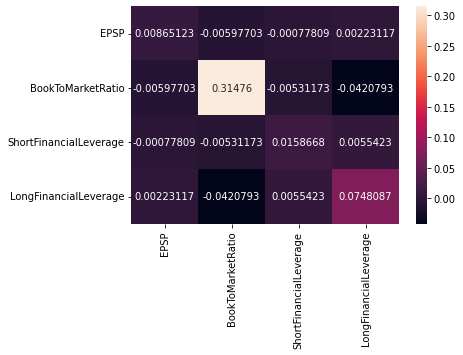

In [19]:
import seaborn as sn
covMatrix = df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']].cov()
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

# Resultados Varianza-Covarianza

Despues de comprobar si bien existe una ligera diferencia de milesimas dentro de los resultados obtenidos, podemos concluir que los resultados son correctos

Ademas podemos notar que la mayoria de lso casos la covarianza es negativa lo que significa que la covariación de ambas variables será en sentido inverso: a valores altos le corresponderán bajos, y a valores bajos, altos

# Correlacion
La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente (esto es, cambian conjuntamente a una tasa constante). Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.

Ahora procedo a calcular la correlacion por medio de algebra matricial

In [20]:
#Calculamos ahora la matriz de varianza y covarianza por medio de algebra matricial

# Cargamos los datos de la matriz on unicamente las variables con las que vamos a trabajar
dfMatrixCorr = df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
X = dfMatrixCorr.values

# Obtenemos el tamaño de la matriz
N, M = X.shape
mean = dfMatrixCorr.mean()

# Creacion de matriz del tamaño de nuestras matrices para guardar los dato dentro
cov = np.zeros((M, M))
correlation = np.zeros((M, M))

for i in range(M):

    # Mean de "i"
    mean_i = np.sum(X[:, i]) / N

    for j in range(M):

        # Mean de column "j"
        mean_j = np.sum(X[:, j]) / N

        cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
        
        # Calculo de la correlacion
        for k in range(M):
          correlation[i, j] = cov[i, j] / ((X[:, i].std()) * (X[:, j].std()))


print(correlation)

[[ 1.00127226 -0.11468557 -0.06649645  0.0878152 ]
 [-0.11468557  1.00127226 -0.07525819 -0.27457089]
 [-0.06649645 -0.07525819  1.00127226  0.16107253]
 [ 0.0878152  -0.27457089  0.16107253  1.00127226]]


In [21]:
#Calculo de matriz de correlacion con ayuda de librerias de python
  
dataframe = df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
  
dataframe.corr() 

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,1.000000,-0.114540,-0.066412,0.087704
BookToMarketRatio,-0.114540,1.000000,-0.075163,-0.274222
ShortFinancialLeverage,-0.066412,-0.075163,1.000000,0.160868
LongFinancialLeverage,0.087704,-0.274222,0.160868,1.000000


# Resultados Correlacion
Comparando los resultados entre la correlacion obtenida por medio de algebra matricial y la que se obtuvo con funciones de python, si bien podemos observar una ligera difenrenncia en las milesimas, esta puede venir a razon de la forma en la que trabaja la funcion, siendo esta más exacta más sin embargo podemos concluir que los resultados obtenidos son correctos,

En este caso podemos observar como la mayoria de nuestras variblaes tienden a tener una correlacion negativa significando que cuando los valores de estas aumenta el de las otras varibales disminuye


# Outliers y leverage points

Corre pruebas estadísticas para detectar outliers y leverage points. Tiene que utilizar álgebra matricial para las pruebas y explicar claramente cómo funcionan las pruebas. Puede utilizar funciones de Python para corroborar resultados.

In [22]:
dfPruebas = df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
dfPruebas['ONE'] = 1

In [23]:
dfPruebas = dfPruebas[['ONE','EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
dfPruebas

,ONE,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
firm,,,,,
AAL,1,-0.138008,-0.754610,0.035341,0.526120
AAWW,1,0.032303,1.094307,0.104785,0.279095
ABM,1,0.024686,0.537670,0.013874,0.241137
ABNB,1,-0.000173,0.043527,0.003722,0.137241
ABSI,1,-0.037713,0.435376,0.016970,0.029083
...,...,...,...,...,...
ZNGA,1,-0.009387,0.434067,0.002689,0.232304
ZS,1,-0.002950,0.015845,0.008119,0.400480
ZUO,1,-0.018348,0.088976,0.029738,0.103417


In [24]:
dfPruebas_T = dfPruebas.transpose()
print(dfPruebas_T)

firm                         AAL      AAWW       ABM      ABNB      ABSI  \
ONE                     1.000000  1.000000  1.000000  1.000000  1.000000   
EPSP                   -0.138008  0.032303  0.024686 -0.000173 -0.037713   
BookToMarketRatio      -0.754610  1.094307  0.537670  0.043527  0.435376   
ShortFinancialLeverage  0.035341  0.104785  0.013874  0.003722  0.016970   
LongFinancialLeverage   0.526120  0.279095  0.241137  0.137241  0.029083   

firm                        ACCD      ACHC      ACIW       ACM      ACVA  ...  \
ONE                     1.000000  1.000000  1.000000  1.000000  1.000000  ...   
EPSP                   -0.029390  0.010327  0.004275  0.003828 -0.012745  ...   
BookToMarketRatio       0.727846  0.437004  0.337993  0.244061  0.230575  ...   
ShortFinancialLeverage  0.005126  0.009602  0.015816  0.003823  0.001367  ...   
LongFinancialLeverage   0.243598  0.327720  0.335810  0.250315  0.061022  ...   

firm                        ZDGE       ZEN        ZI    

Formula para "Hat Matrix"

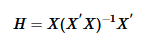






In [25]:
dfPruebas_hat = dfPruebas.dot(np.linalg.inv(dfPruebas_T.dot(dfPruebas)).dot(dfPruebas_T))
dfPruebas_hat

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,784,785,786
firm,,,,,,,,,,,,,,,,,,,,,
AAL,0.010155,-0.003447,-0.000309,0.002508,0.001182,0.000012,0.000688,0.001303,0.001651,0.001738,...,-0.000253,0.003159,0.002381,0.003170,0.001367,0.000988,0.003194,0.002541,0.006488,0.002499
AAWW,-0.003447,0.004360,0.001879,-0.000046,0.000877,0.001915,0.001441,0.001118,0.000688,0.000372,...,0.001343,0.000484,0.000109,0.000404,0.000379,0.001149,0.000010,0.000088,-0.001502,0.001907
ABM,-0.000309,0.001879,0.001657,0.001348,0.001414,0.001434,0.001440,0.001337,0.001375,0.001443,...,0.001849,0.000922,0.001331,0.000931,0.001618,0.001413,0.001069,0.001267,0.000042,0.000232
ABNB,0.002508,-0.000046,0.001348,0.002706,0.002279,0.000903,0.001196,0.001339,0.001877,0.002621,...,0.002518,0.001249,0.002429,0.000757,0.002984,0.001557,0.001724,0.002675,0.002160,-0.000589
ABSI,0.001182,0.000877,0.001414,0.002279,0.002691,0.001440,0.001082,0.001115,0.001594,0.002584,...,0.002663,0.000549,0.002007,-0.000133,0.002795,0.001610,0.000999,0.002467,0.003474,0.001518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,0.000988,0.001149,0.001413,0.001557,0.001610,0.001387,0.001319,0.001296,0.001423,0.001633,...,0.001723,0.001007,0.001505,0.000989,0.001713,0.001430,0.001248,0.001524,0.001534,0.000978
ZS,0.003194,0.000010,0.001069,0.001724,0.000999,0.000820,0.001317,0.001452,0.001542,0.001380,...,0.001023,0.001908,0.001715,0.002131,0.001431,0.001248,0.002015,0.001544,0.001074,-0.000025
ZUO,0.002541,0.000088,0.001267,0.002675,0.002467,0.000941,0.001075,0.001231,0.001787,0.002679,...,0.002541,0.001154,0.002366,0.000446,0.003004,0.001524,0.001544,0.002769,0.002839,0.000134


# Leverage Point

el Leverage, `hii` , cuantifica la influencia que la respuesta observada y `i` tiene sobre su valor predicho `y^i`. Es decir, si `hii` es pequeño, entonces la respuesta observada y `i` juega solo un papel pequeño en el valor de la respuesta predicha `y^i`. Por otro lado, si `hii` es grande, entonces la respuesta observada `yi` juega un papel importante en el valor de la respuesta predicha `y^i`. Es por esta razón que los `hii` se denominan " Leverage".

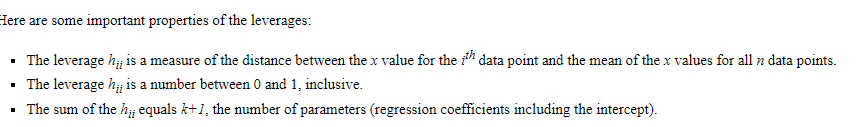



En esta parte procedo a calcular los leverage point de todo los datos de las variables de mi modelo, esto obteniendolo atavez de la diagonal de la 'Hat Matrix', asi mismo tango hago la sumatoria de estos para comprobar que obtengo el numero exacto de mis variables 4 (['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']), más 1 ([ONE]), que vendria a ser la columna de 1 dentro de mi modelo, dando asi el resultado de 5, que como podemos observar es correcto

In [26]:
#Leverage Points
lPoints = np.diagonal(dfPruebas_hat)
lPoints_Num = lPoints.sum()
lPoints_Num

5.0

Para esta siguiente parte procedo a hacer uso de la siguiente formula, 

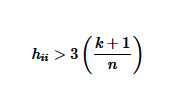

donde en casode que algun 'Leverage Point' sea 3 veces mayor a la media del leverage value, este sera considerado un 'Unusual X'

Como dato extra en la lectura se agrega que, un punto de datos tiene una gran influencia solo si afecta la función de regresión estimada. Como sabemos por nuestra investigación de este conjunto de datos en la sección anterior, el punto de datos rojo no afecta tanto a la función de regresión estimada. Los apalancamientos solo tienen en cuenta los extremos de los valores de x , pero una observación de alto apalancamiento puede o no ser realmente influyente.

In [27]:
unusualX = 3 * (lPoints_Num / lPoints.shape[0])
for i in lPoints:
  if i > unusualX:
    print(i)


0.05758087042648529
0.06504078267034119
0.01988196232617959
0.027553649051699162
0.020015172069266708
0.029535015542449507
0.09775269041591048
0.04724845426677314
0.034940472616582396
0.01966241007957501
0.035356335413340864
0.03389365822811848
0.05511144125812032
0.019714498189532387
0.024756368044058317
0.04299039759172296
0.6317857731919055
0.15612811810635746
0.045881733216003265
0.06185311810003491
0.2545458837143884
0.029412515092132448
0.043399030262481146
0.04862503317926184
0.03500353602404346
0.0215133957225794
0.05888747303481502
0.022712578326805153
0.2678723510175478
0.04926242834884538


# Outliers

Un outlier es una observación anormal y extrema en una muestra estadística o serie temporal de datos que puede afectar potencialmente a la estimación de los parámetros del mismo.

Para la obtecion de los outliers hare uso de 2 medidas siendo estas

*   Residuals
Como sabe, los residuos ordinarios se definen para cada observación, `i = 1, ..., n` como la diferencia entre las respuestas observadas y pronosticadas:

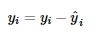


Como sabe, el principal problema con los residuos ordinarios es que su magnitud depende de las unidades de medida, lo que dificulta el uso de los residuos como una forma de detectar valores inusuales de y . Podemos eliminar las unidades de medida dividiendo los residuos por una estimación de su desviación estándar, obteniendo así lo que se conoce como **residuos estandarizados.**



*   Standardized Residuals
Los residuos estandarizados (a veces denominados "residuos estudentizados internamente") se definen para cada observación, `i = 1, ..., n` como un residuo ordinario dividido por una estimación de su desviación estándar:

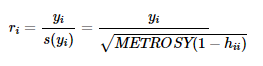

Lo bueno de los residuales estandarizados es que cuantifican qué tan grandes son los residuales en unidades de desviación estándar y, por lo tanto, se pueden usar fácilmente para identificar valores atípicos:


*   Algunos consideran que una observación con un residuo estandarizado mayor que 3 (en valor absoluto) es un valor atípico . [Técnicamente, es más correcto reservar el término "valor atípico" para una observación con un residual estudentizado que es mayor que 3 en valor absoluto; consideramos los residuales estudentizados en la siguiente sección.]

*   Algunos software estadísticos marcan cualquier observación con un residuo estandarizado mayor que 2 (en valor absoluto).


Usar un límite de 2 puede ser un poco conservador, pero tal vez sea mejor prevenir que curar. La clave aquí es no tomar los puntos de corte de 2 o 3 demasiado literalmente. En su lugar, trátelos simplemente como banderas rojas de advertencia para investigar más los puntos de datos.

Informacion obtenida de https://online.stat.psu.edu/stat462/node/172/

In [28]:
#Outliers
#Comienzo definiendo las variaable que voy a utilizar durante el calculo de las siguientes operaciones
y_i = df_ServiceLast['RNQ']
y_i

firm
AAL    -0.514447
AAWW   -0.098678
ABM    -0.008253
ABNB   -0.541818
ABSI    0.000000
          ...   
ZNGA   -0.099826
ZS     -0.368193
ZUO    -0.656159
ZVO    -0.982014
ZY     -3.482115
Name: RNQ, Length: 787, dtype: float64

In [29]:
dfOutlier_hat = dfPruebas_hat
N, M = dfOutlier_hat.shape
dfOutlier_hat  = dfOutlier_hat.values.reshape(N,N)
y_hat = dfOutlier_hat.dot(y_i)

En esta parte obtendo de valor de y_hat con esta formula que podemos obtener de la lectura

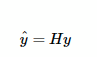

In [30]:
#Residuals
error = y_i - y_hat
error

firm
AAL     0.254495
AAWW    0.280650
ABM     0.375680
ABNB   -0.130454
ABSI    0.520326
          ...   
ZNGA    0.370947
ZS      0.077665
ZUO    -0.203480
ZVO     0.150288
ZY     -2.359156
Name: RNQ, Length: 787, dtype: float64

In [31]:
#Obtenngo el Mean Squared Error
mse = np.square(error).sum() / N
mse

0.32499568244494353

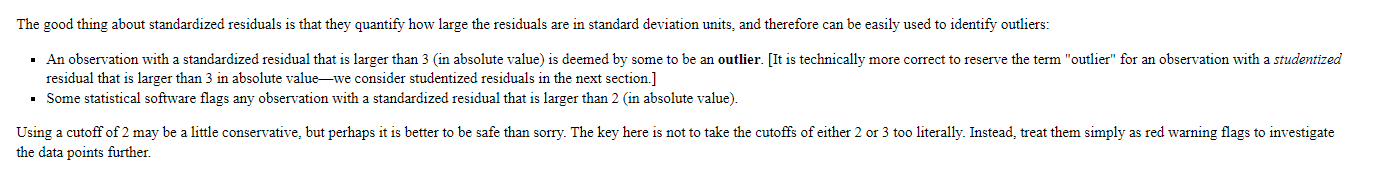

In [32]:
#Standardize residuals
std_R= error / np.sqrt(mse * (1 - lPoints)) 
std_R[std_R > 3]

firm
HMHC    3.259552
RCMT    3.255703
WTRH    3.359928
Name: RNQ, dtype: float64

# Análisis de multicolinealidad

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [35]:
calculate_vif(df=df_ServiceLast, features=['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage'])

,VIF,Tolerance
EPSP,1.024298,0.976279
BookToMarketRatio,1.092864,0.915027
ShortFinancialLeverage,1.035219,0.965980
LongFinancialLeverage,1.110543,0.900461


# Propone e implementa soluciones a los problemas de los puntos anteriores para que el modelo sea el más adecuado. 

Como forma de crear un modelo mas adecuado decidi eliminar los outliers que obtuve de las pruebas anteriores, sin embargo como lo podran ver más a adenlate comparando el r2 de este modelo 'mejorado' y el modelo completo, al diferencia entre los resultados obtenido de ambos modelo no es muy significativa, y siendo que ademas en el caso de las varibles, entre ellas no hay ninguna con un suficiente nivel de multicolinealidad o de error significativo como para excluirlas, considero que para un futuro se podrian llegar a realizar algun otro tipo de prueba para poder mejorar de una manera más significativa el modelo de la base de datos

In [36]:
df_ServiceLast_V2 = df_ServiceLast
df_ServiceLast_V2

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,RNQ
firm,,,,,
AAL,-0.138008,-0.754610,0.035341,0.526120,-0.514447
AAWW,0.032303,1.094307,0.104785,0.279095,-0.098678
ABM,0.024686,0.537670,0.013874,0.241137,-0.008253
ABNB,-0.000173,0.043527,0.003722,0.137241,-0.541818
ABSI,-0.037713,0.435376,0.016970,0.029083,0.000000
...,...,...,...,...,...
ZNGA,-0.009387,0.434067,0.002689,0.232304,-0.099826
ZS,-0.002950,0.015845,0.008119,0.400480,-0.368193
ZUO,-0.018348,0.088976,0.029738,0.103417,-0.656159


In [37]:
df_ServiceLast_V2 = df_ServiceLast_V2.drop('HMHC')
df_ServiceLast_V2 = df_ServiceLast_V2.drop('RCMT')
df_ServiceLast_V2 = df_ServiceLast_V2.drop('WTRH')

In [38]:
model = sm.OLS(df_ServiceLast_V2['RNQ'], sm.add_constant(df_ServiceLast_V2[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     38.38
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           2.44e-29
Time:                        07:26:40   Log-Likelihood:                -657.13
No. Observations:                 784   AIC:                             1324.
Df Residuals:                     779   BIC:                             1348.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Modelo de regresión múltiple

In [39]:
dfCondiciones = df_ServiceLast

In [40]:
x = dfCondiciones[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
y = dfCondiciones['RNQ']

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [42]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [43]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [44]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost is: 0.31863180419003734
Cost is: 0.17090188353027355
Cost is: 0.1705048449766572
Cost is: 0.17049997522961377
Cost is: 0.17049965064875727
Cost is: 0.17049962374661304
Cost is: 0.17049962148291598
Cost is: 0.17049962129208912
Cost is: 0.170499621275998
Cost is: 0.17049962127464108


In [45]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

In [46]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.19169088518312216

In [47]:
#Calculo los coeficientes del modelo de regresion
X = dfCondiciones[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
Y = dfCondiciones[['RNQ']]
X['ONE'] = 1

X = X[['ONE','EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
X

,ONE,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
firm,,,,,
AAL,1,-0.138008,-0.754610,0.035341,0.526120
AAWW,1,0.032303,1.094307,0.104785,0.279095
ABM,1,0.024686,0.537670,0.013874,0.241137
ABNB,1,-0.000173,0.043527,0.003722,0.137241
ABSI,1,-0.037713,0.435376,0.016970,0.029083
...,...,...,...,...,...
ZNGA,1,-0.009387,0.434067,0.002689,0.232304
ZS,1,-0.002950,0.015845,0.008119,0.400480
ZUO,1,-0.018348,0.088976,0.029738,0.103417


En esta parte procedo a obtener los coeficiente de cada una de mis variables, donde comparando estos resultados con los resultados obtenido en el modelo de python, podemos observar que si bien los resultados son parecidos, el modelo de python parace que redondea en algunos casos los datos de los coeficientes

In [48]:
coef = (np.linalg.inv(X.T.dot(X))).dot(X.T.dot(Y))
coef

array([[-0.39363504],
       [ 2.68207494],
       [-0.06063702],
       [ 0.24448596],
       [-0.11320177]])

En cuanto al 'std err' podemos observar una variazion mayor en los rasuldados obtenidos donde el std de LongFinancialLeverage y BookToMarketRatio parecen ser los que más varian entre ellos, si bien no a una cantidan considerable, si es curioso ver este lijero desfase entre los resultados obtenido con algebra matricial, y aquellos obtenidos por medio de python

In [49]:
x = dfCondiciones[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']]
y = dfCondiciones[['RNQ']]
yi = X.dot(coef)
err = np.subtract(y, yi)
N, M = err.shape
ones = np.ones((N,M))

err = (1 / (N - 1)) * ((err.T).dot(err) - (1 / N) * ((err.T).dot(ones)).dot((err.T).dot(ones).T))
e = err['RNQ'][0]
b = e * np.linalg.inv((x.T).dot(x))

std_err = np.sqrt(np.diagonal(b))
print(*std_err, sep='\n')

0.22083688557303005
0.031241227041923354
0.16395750099808626
0.05404267166014088


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  after removing the cwd from sys.path.


In [50]:
model = sm.OLS(df_ServiceLast['RNQ'], sm.add_constant(df_ServiceLast[['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     38.53
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.85e-29
Time:                        07:27:04   Log-Likelihood:                -674.43
No. Observations:                 787   AIC:                             1359.
Df Residuals:                     782   BIC:                             1382.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
